<h2>Sales Analysis</h2>

<h4>Import necessary Libraries</h4>

In [1]:
import pandas as pd
import os

#Merging sales data into a single CSV file

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

path = r"C:\Users\Shiya\Desktop\Siya\Data Analysis\Sales Analysis\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"  #Always use raw string or double backlashes while writing path
files = os.listdir(path)   #Shows output in list form

all_months_data = pd.DataFrame()  #Store all merged dataframes

for file in files:         #Shows output in form of dataframes
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

<h4>Read in updated dataframe</h4>

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


<h4>Cleaning Data</h4>

#Drop rows of NAN

In [4]:
nan_data = all_data[all_data.isna().any(axis=1)]        #Detecting a value in dataframe
nan_data.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#Detect Or and Delete it

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
#Convert str to int

In [7]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

<h3>Augment Data</h3>

#Add a month column 

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]            #In Month column we put the first two characters of string value in Order Date column
all_data['Month'] = all_data['Month'].astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#Add a sales column

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#Add a city column

In [10]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]   #Used to extract second word after second comma, first word being whitespace

all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_city(x) + ' ' + get_state(x))       #lambda x is used to grab cell contents of each cell

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


<h3>Best Month for Sales</h3>

In [11]:
results = all_data.groupby('Month').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73,Dallas TX New York City NY New York City NY S...
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42,Portland ME San Francisco CA New York City NY...
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38,San Francisco CA Portland OR San Francisco CA...
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604-07-2019 22:3004-12-2019 14:38...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24,Dallas TX Boston MA Los Angeles CA Los Angele...
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05-01-2019 03:2905-01-2019 00:1305-01-2019 00:...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75,Portland OR San Francisco CA Boston MA Boston...
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26,Portland ME San Francisco CA Los Angeles CA S...
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76,Atlanta GA Seattle WA Atlanta GA Atlanta GA S...
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88,Seattle WA Dallas TX Portland OR Los Angeles ...
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13,San Francisco CA San Francisco CA Seattle WA ...


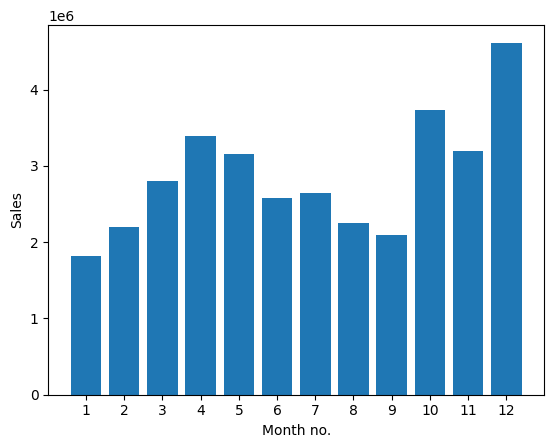

In [12]:
import matplotlib.pyplot as plt

months = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.bar(months, results['Sales'])

plt.xlabel('Month no.')
plt.ylabel('Sales')

plt.xticks(months)

plt.show()


<h2>Best City for Sales</h2>

In [13]:
result = all_data.groupby('City').sum()
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta GA,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04-12-2019 10:5804/19/19 14:2904/27/19 12:2004...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin TX,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104-11-2019 16:5904/20/19 20:5304...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston MA,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04-07-2019 22:3004-08-2019 14:0504-09-2019 23:...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas TX,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904-0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles CA,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04-12-2019 14:3804-12-2019 14:3804/30/19 09:27...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City NY,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04-04-2019 20:3004/27/19 00:3004-11-2019 10:23...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland ME,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304-0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland OR,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco CA,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


[]

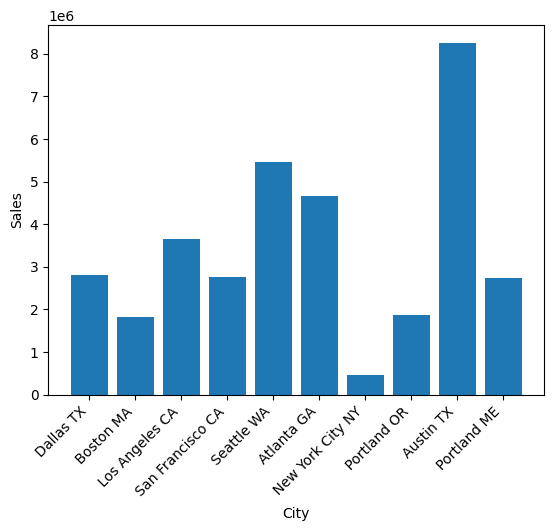

In [14]:
import matplotlib.pyplot as plt

cities = all_data['City'].unique()     #Returns numpy array containing unique city names

plt.bar(cities, result['Sales'])

plt.xlabel('City')
plt.ylabel('Sales')

plt.xticks(rotation=45, ha='right')    #rotates x-axis labels by 45 degree and aligns it to right to prevent overlapping

plt.plot()

<h2>Time to display advertisements to maximize likelihood of customer buying products</h2>

In [15]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

C:\Users\Shiya\AppData\Local\Temp\ipykernel_14288\1435542791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


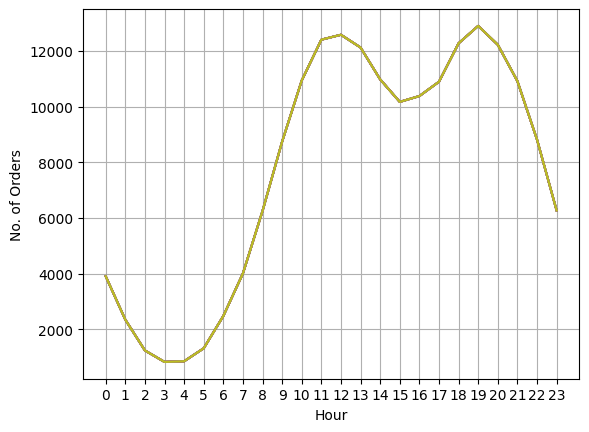

In [18]:
hours = [hour for hour, df in all_data.groupby('Hour')]  #lists out hours in serial manner
ans = all_data.groupby(['Hour']).count()      #keeps a count of each hour
#hours = all_data['Hour'].unique()            #lists out hours as per order given in dataframe

plt.plot(hours, ans)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.grid()

<h2>Most Sold Product</h2>

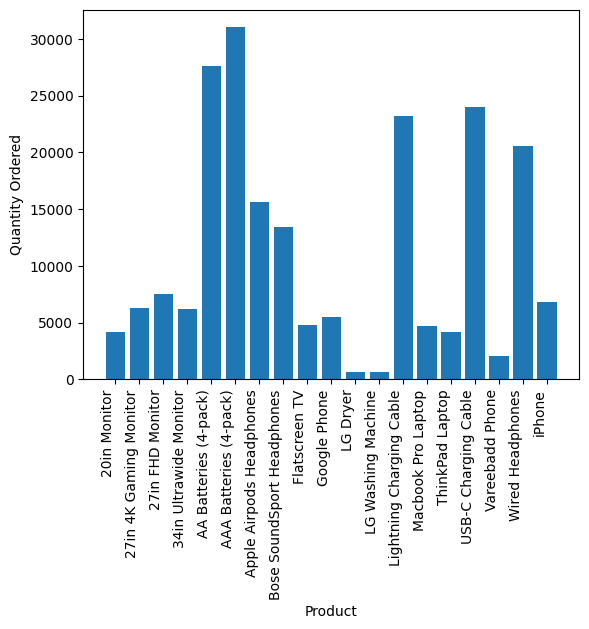

In [19]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation=90, ha='right')
plt.show()

C:\Users\Shiya\AppData\Local\Temp\ipykernel_14288\2830070738.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation=90, ha='right')


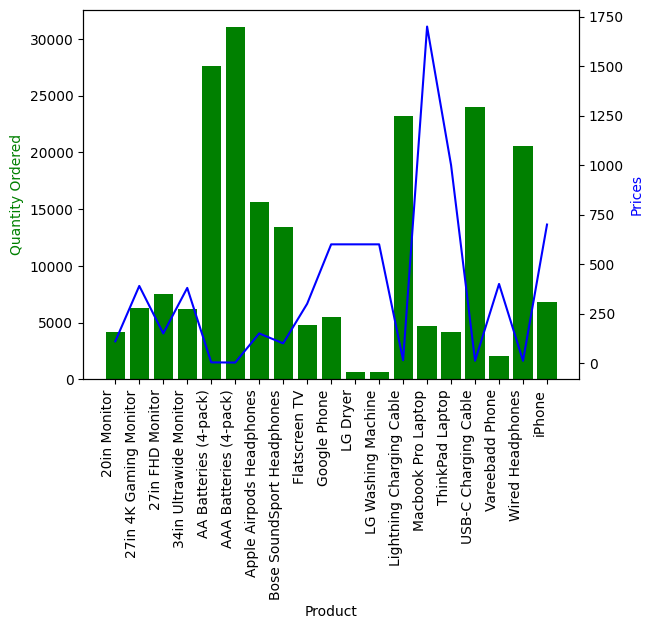

In [29]:
prices = product_group['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation=90, ha='right')

plt.show()

#Products that have been ordered maximum have low prices compared to products that have been ordered in less number